In [36]:
import numpy as np
import pandas as pd

data_path = './bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [37]:
train.shape , test.shape

# 훈련 데이터는 10886행 12열로 구성되어있고,
# 테스트 데이터는 6493행 9열로 구성 되어있다.

# 열의 개수는 피처 개수를 나타낸다.

((10886, 12), (6493, 9))

In [38]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
test.head()

# 훈련데이터의 피처에서 casual과 registered가 빠졌다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [40]:
submission.head()

# datetime은 데이터를 구분하는 역할만 하므로 타깃값을 예측하는 데에는 아무런 도움을 주지 않는다.

# 추후 모델 훈련시 훈련 데이터에 있는 datetime 피처는 제거한다.

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [41]:
train.info() # 각 열의 결측값이 몇 개인지, 데이터 타입은 무엇인지 파악 가능

# 훈련 데이터에는 결측값이 존재 X, 10886개의 데이터 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [42]:
test.info()

# 6493개의 열 , 0개의 결측값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 피처 엔지니어링

In [43]:
# 데이터를 다양한 관점에서 시각화 해보면 raw data에서는 찾기 어려운 경향, 공통점, 차이 등이 드러날 수 있다.

# 일부 데이터는 시가화 하기에 적합하지 않은 형태 일 수 있다.

# datetime의 경우 적합하지 않은 데이터라 볼 수 있다.

print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간


# datetime 피처는 object 타입이기 때문에 문자열처럼 다룰 수 있다.

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [44]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-')) # '-'기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 년
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [45]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(':')) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0]) # 시간
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [46]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0])
# 날짜 피처 생성

# 연도 , 월 , 일 , 시 , 분 , 초 피처를 차례로 생성

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])


train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


##  datetime의 요일 변환

In [47]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100] , '%Y-%m-%d'))
# datetime 타입으로 변경

# 정수로 요일 반환
print(datetime.strptime(train['date'][100] , '%Y-%m-%d').weekday())

# 문자열로 요일 변환

print(calendar.day_name[datetime.strptime(train['date'][100] , '%Y-%m-%d').weekday()])



2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [48]:
train['weekday'] = train['date'].apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

train['weekday'].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: weekday, dtype: object

In [49]:
train['season'] = train['season'].map(
    {1: 'Spring',
     2: 'Summer',
     3: 'Fall',
     4: 'Winter'})

train['weather'] = train['weather'].map(
    {1 : 'Clear',
     2 : 'Mist , Few clouds',
     3 : 'Light Show, Rain, Thunderstorm',
     4 : 'Heavy Rain, Thunderstorm, Snow, Fog'}
)


train[['season' , 'weather']].head()

,season,weather
0,Spring,Clear
1,Spring,Clear
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear


## 데이터 시각화

In [50]:
# 피처를 추가한 훈련 데이터를 그래프로 시각화해본다. 시가화는 탐색적 데이터 분석에서 가장 중요한 부분이다.
# 데이터 분포나 데이터 간 관계를 한눈에 파악할 수 있기 때문이다.

In [51]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


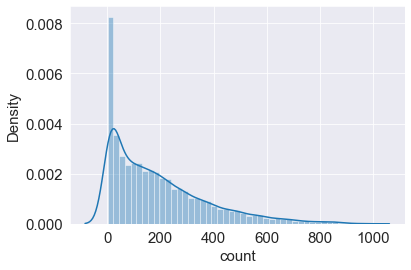

In [52]:
mpl.rc('font' , size = 15) # 폰트 크기를 15로 설정

sns.distplot(train['count']) # 분포도 출력


# x 축은 타깃값인 count를 나타내고, y축은 총 개수를 나타낸다. 분포도를 보면 타깃값인 count가 0 근처에 몰려 있다.


#  분포가 왼쪽으로 많이 편향되어 있어 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야만 한다.

# 이를 그대로 사용하여 모델링한다면 좋은 성능을 기대하기 어렵다.

# 데이터 분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용되는 방법은 로그변환이다. 로그 변환은 count 분포와 같이 데이터가 왼쪽으로 편향되어 있을 때 사용한다.

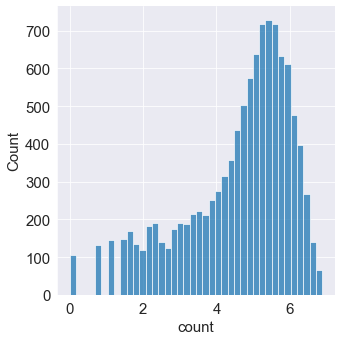

In [53]:
sns.displot(np.log(train['count']))

# 마지막에는 지수변환하여 count로 복원해야만 한다!!!

## 막대 그래프

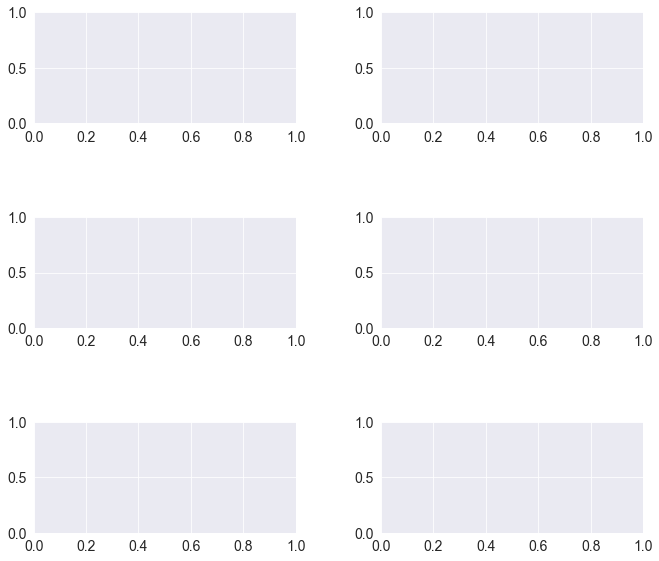

In [54]:
# seaborn의 barplot()함수로 막대 그래프를 그릴 수 있다.


# m행 n열 Figure 준비하기

mpl.rc('font' , size = '14') # 폰트 크기 설정
mpl.rc('axes', titlesize= 15) # 각 축 제목 크기 설정
figure, axes = plt.subplots(nrows=3 , ncols= 2) # 3행 2열 Figure 생성

plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) # 전체 Figure 크기를 10x9인치로 설정

In [55]:
axes # AxesSubplots 객체 6개가 3행 2열로 구성된 배열이 출력되었다.

# 이 배열을 입력으로 axes.shape을 실행하면 (3,2) 가 출력된다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024733180BE0>,
      dtype=object)

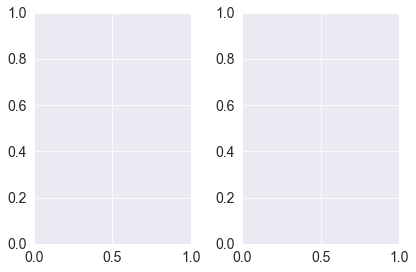

In [56]:
figure , axes = plt.subplots(nrows=1 , ncols = 2)
plt.tight_layout() # 서브플롯 사이에 여백을 줘 간격을 넓히는 역할

## 각 축에 서브플롯 할당

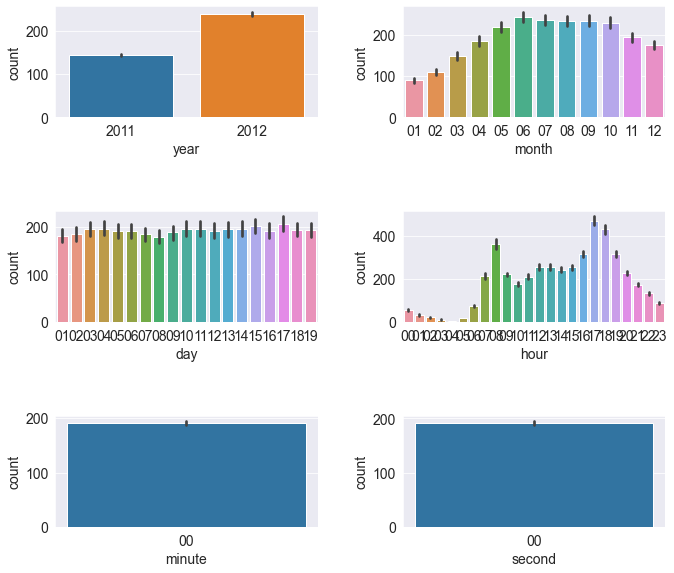

In [61]:
mpl.rc('font' , size = '14') # 폰트 크기 설정
mpl.rc('axes', titlesize= 15) # 각 축 제목 크기 설정
figure, axes = plt.subplots(nrows=3 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) # 전체 Figure 크기를 10x9인치로 설정

sns.barplot(x='year' , y = 'count' , data=train , ax = axes[0,0])
sns.barplot(x='month' , y = 'count' , data=train , ax = axes[0,1])
sns.barplot(x='day' , y = 'count' , data=train , ax = axes[1,0])
sns.barplot(x='hour' , y = 'count' , data=train , ax = axes[1,1])
sns.barplot(x='minute' , y = 'count' , data=train , ax = axes[2,0])
sns.barplot(x='second' , y = 'count' , data=train , ax = axes[2,1])


# 그래프에 barplot 값들 할당

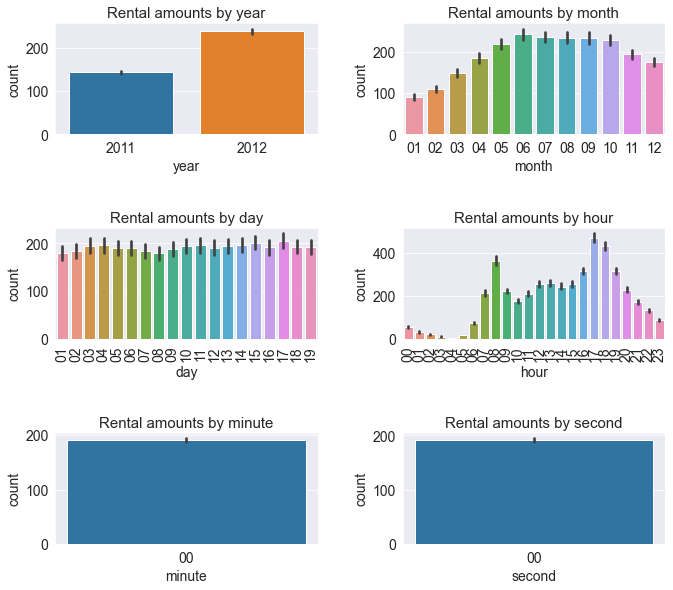

In [63]:
mpl.rc('font' , size = '14') # 폰트 크기 설정
mpl.rc('axes', titlesize= 15) # 각 축 제목 크기 설정
figure, axes = plt.subplots(nrows=3 , ncols= 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) # 전체 Figure 크기를 10x9인치로 설정

sns.barplot(x='year' , y = 'count' , data=train , ax = axes[0,0])
sns.barplot(x='month' , y = 'count' , data=train , ax = axes[0,1])
sns.barplot(x='day' , y = 'count' , data=train , ax = axes[1,0])
sns.barplot(x='hour' , y = 'count' , data=train , ax = axes[1,1])
sns.barplot(x='minute' , y = 'count' , data=train , ax = axes[2,0])
sns.barplot(x='second' , y = 'count' , data=train , ax = axes[2,1])


# 그래프에 barplot 값들 할당


# 각가의 그래프에 title 값 붙인다.

axes[0,0].set(title ='Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')


# 1행에 위치한 서브플롯들의 x 축 라벨 90도 회전

axes[1,0].tick_params(axis='x' , labelrotation =90)
axes[1,1].tick_params(axis='x' , labelrotation =90)

## 박스 플롯

In [ ]:
# 박스플롯은 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프이다. 막대 그래프 보다 더 많은 정보를 제공한다.


# Step-1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols = 2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10,10)

# Step-2 : 서브플롯 할당

# 계절, 날씨 ,공휴일,  근무일별 대여 수량 박스플롯

sns.boxplot(x='season' , y='count' , data= train, ax=axes[0,0])